##  loading the data set


In [1]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd
import io

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##  Visualisations

##  Univariate Analysis

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


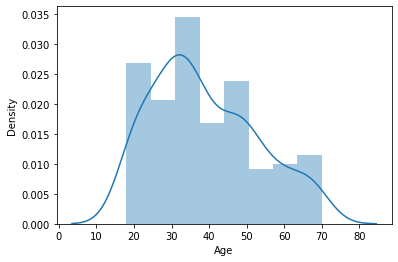

In [9]:
sns.distplot(df.Age)

## Bi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


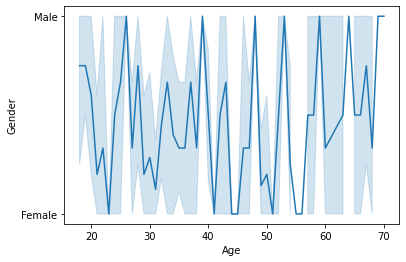

In [10]:
sns.lineplot(df.Age,df.Gender)
plt.show()

##  MultiVariate Analysis

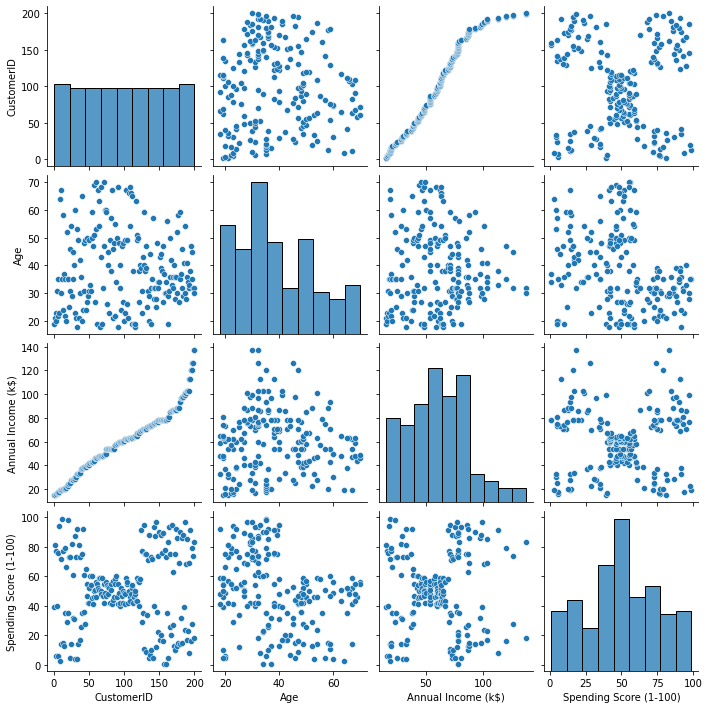

In [11]:
sns.pairplot(df)

## Descriptive Statistics

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Dealing with the Missing Values

In [13]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## Finding the Outliers and Replace them

In [14]:
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv('Mall_Customers.csv')

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


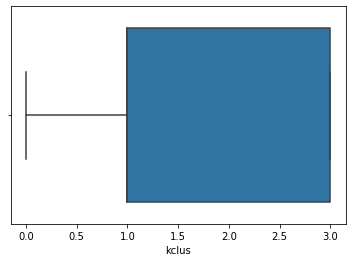

In [70]:
sns.boxplot(df.kclus)

In [72]:
df.median()

CustomerID                100.5
Gender                      0.0
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
kclus                       1.0
dtype: float64

In [71]:
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)

In [73]:
IQR=Q3-Q1

In [74]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [75]:
df['kclus']=np.where(df['kclus']>upper_limit,30,df['kclus'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


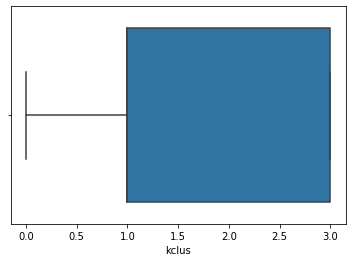

In [76]:
sns.boxplot(df.kclus)

## Checking the Categorical columns and performing the Encoding method

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
df.Gender=le.fit_transform(df.Gender)

In [21]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [22]:
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

##  Performing the clustering method

In [23]:
from sklearn import cluster

In [24]:
error=[]

In [25]:
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

In [26]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.33607611558]

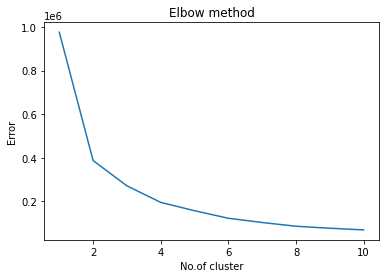

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('No.of cluster')
plt.ylabel('Error')
plt.show()

In [28]:
km_model=cluster.KMeans(n_clusters=4,init='k-means++',random_state=0)

In [29]:
km_model.fit(df)

KMeans(n_clusters=4, random_state=0)

In [30]:
ykmeans=km_model.predict(df)
ykmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [32]:
km_model.predict([[1,1,19,15,39]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([3], dtype=int32)

##11. Adding the cluster data to primary data

In [33]:
df['kclus']=pd.Series(ykmeans)

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3


##8. spliting the X and y

In [35]:
X=df.iloc[:,:-1]

In [36]:
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [37]:
y=df.kclus

In [38]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: kclus, dtype: int32

## 9. Scaling the Independent Variables

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scale=MinMaxScaler()

In [41]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [42]:
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)

In [44]:
X_train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
71,0.356784,0.0,0.557692,0.278689,0.418367
124,0.623116,0.0,0.096154,0.450820,0.285714
184,0.924623,0.0,0.442308,0.688525,0.387755
97,0.487437,0.0,0.173077,0.368852,0.500000
149,0.748744,1.0,0.307692,0.516393,0.908163
...,...,...,...,...,...
67,0.336683,0.0,0.961538,0.270492,0.479592
192,0.964824,1.0,0.288462,0.803279,0.071429
117,0.587940,0.0,0.596154,0.409836,0.591837
47,0.236181,0.0,0.173077,0.204918,0.469388


In [45]:
X_train.shape

(150, 5)

In [46]:
y_train

71     1
124    1
184    0
97     1
149    2
      ..
67     1
192    0
117    1
47     3
172    0
Name: kclus, Length: 150, dtype: int32

In [47]:
y_train.shape

(150,)

In [48]:
X_test

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
18,0.090452,1.0,0.653846,0.065574,0.285714
170,0.854271,1.0,0.423077,0.590164,0.122449
107,0.537688,1.0,0.692308,0.393443,0.459184
98,0.492462,1.0,0.576923,0.377049,0.418367
177,0.889447,1.0,0.173077,0.598361,0.693878
182,0.914573,1.0,0.538462,0.680328,0.142857
5,0.025126,0.0,0.076923,0.016393,0.765306
146,0.733668,1.0,0.576923,0.508197,0.357143
12,0.060302,0.0,0.769231,0.040984,0.142857
152,0.763819,0.0,0.500000,0.516393,0.193878


In [49]:
X_test.shape

(50, 5)

##Building the Model

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
MLR=LinearRegression()

In [52]:
MLR.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=MLR.predict(X_test)

In [54]:
y_pred

array([ 2.07924902,  0.00579985,  1.28260424,  1.39122481,  0.94250681,
       -0.07690569,  3.30021859,  0.64038038,  1.9169559 ,  0.35303004,
        2.28581235,  1.79546493,  0.35085597,  0.22802442,  1.71132516,
        3.57739473,  3.25642079,  0.39458896,  2.83938732,  1.73503944,
        1.32277108,  1.84125933,  2.6668533 ,  1.23309705,  1.95753092,
        1.94941566,  1.27132532,  1.39558083,  1.44774143,  1.8752806 ,
        2.36370082,  1.91610752,  0.29355712,  1.64825537,  1.71760773,
        1.17840895,  1.60247648,  2.63960449,  1.66789568,  1.33393651,
        0.47288063,  2.01710184,  2.15232477,  1.43812222,  0.35935281,
        2.1328895 ,  1.67692068,  2.07168717,  1.15915966,  1.7157946 ])

In [55]:
y_test

18     3
170    0
107    1
98     1
177    2
182    0
5      3
146    0
12     3
152    0
61     3
125    2
180    0
154    0
80     1
7      3
33     3
130    0
37     3
74     1
183    2
145    2
45     3
159    2
60     1
123    2
179    2
185    2
122    1
44     3
16     3
55     3
150    0
111    1
22     3
189    2
129    2
4      3
83     1
106    1
134    0
66     1
26     3
113    1
168    0
63     1
8      3
75     1
118    1
143    2
Name: kclus, dtype: int32

In [56]:
pd.DataFrame({'Actual_y':y_test,'predicted_y':y_pred})

,Actual_y,predicted_y
18,3,2.079249
170,0,0.005800
107,1,1.282604
98,1,1.391225
177,2,0.942507
182,0,-0.076906
5,3,3.300219
146,0,0.640380
12,3,1.916956
152,0,0.353030


In [57]:
train_pred=MLR.predict(X_train)

In [58]:
train_pred

array([ 1.77619860e+00,  1.05111629e+00,  3.96160600e-01,  1.73314651e+00,
        1.62088168e+00,  1.81653469e+00,  1.47133607e+00,  3.94514211e-01,
        1.93905102e+00,  2.08687086e+00,  1.55995762e+00,  1.55728917e+00,
        1.29011987e+00,  3.41067605e+00,  1.33353732e+00,  1.60429175e+00,
        2.03150638e+00,  1.53414003e+00,  2.39818248e+00,  1.82731614e+00,
        1.48416091e+00,  1.63792981e+00,  1.49460359e+00,  1.49675603e+00,
        4.30008015e-01,  1.61763010e+00,  1.19590664e+00,  1.94611493e+00,
        2.64981586e+00,  1.79019392e+00,  9.04749186e-01,  2.30601866e+00,
        5.07081777e-01,  1.19066149e+00,  1.11405761e+00,  1.93861199e+00,
        2.16061449e+00,  1.92562142e+00,  3.51565372e-01,  1.11592697e+00,
        2.58417433e+00,  1.80785159e+00,  4.80061041e-02,  1.89970287e+00,
        3.07018953e-01, -1.78563859e-01,  1.29741751e+00,  9.37487025e-01,
        1.54078221e+00,  1.30312543e+00, -5.69766493e-02,  8.98483675e-01,
        2.21629148e+00,  

In [59]:
test_pred=MLR.predict(X_test)

In [60]:
test_pred

array([ 2.07924902,  0.00579985,  1.28260424,  1.39122481,  0.94250681,
       -0.07690569,  3.30021859,  0.64038038,  1.9169559 ,  0.35303004,
        2.28581235,  1.79546493,  0.35085597,  0.22802442,  1.71132516,
        3.57739473,  3.25642079,  0.39458896,  2.83938732,  1.73503944,
        1.32277108,  1.84125933,  2.6668533 ,  1.23309705,  1.95753092,
        1.94941566,  1.27132532,  1.39558083,  1.44774143,  1.8752806 ,
        2.36370082,  1.91610752,  0.29355712,  1.64825537,  1.71760773,
        1.17840895,  1.60247648,  2.63960449,  1.66789568,  1.33393651,
        0.47288063,  2.01710184,  2.15232477,  1.43812222,  0.35935281,
        2.1328895 ,  1.67692068,  2.07168717,  1.15915966,  1.7157946 ])

## Measuring the Performance using Metrics

In [61]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [62]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
test_pred=model.predict(X_test)

In [64]:
train_pred=model.predict(X_train)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
print('Testing accuracy:',accuracy_score(y_test,test_pred))

Testing accuracy: 0.94


In [67]:
print('Training accuracy:',accuracy_score(y_train,train_pred))

Training accuracy: 1.0


In [68]:
pd.crosstab(y_test,test_pred)

col_0,0,1,2,3
kclus,,,,
0,10,0,0,0
1,0,14,0,0
2,0,2,9,0
3,0,1,0,14


In [69]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90        14
           2       1.00      0.82      0.90        11
           3       1.00      0.93      0.97        15

    accuracy                           0.94        50
   macro avg       0.96      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50

